In [3]:
import tensorflow
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt

- Vrsimo predvidjanje neke vrednosti
- Ucimo funkciju
- Sve zapisujemo matricno

In [4]:
# X = [1, x1, x2, x3, ..., xn,
#      1, x1, x2, x3, ..., xn,
#      1, x1, x2, x3, ..., xn]

# W = [w0,
#      w1,
#      w2,
#      ...,
#      wn]

# Y = X*W 

# # prediktovane vrednosti
# Y = [Y1,
#      Y2,
#      ...,
#      Yn]

# W = (X^T * X)^(-1) * X^T * Y

In [5]:
height = np.array([4.0, 4.5, 5.0, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
weight = np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])

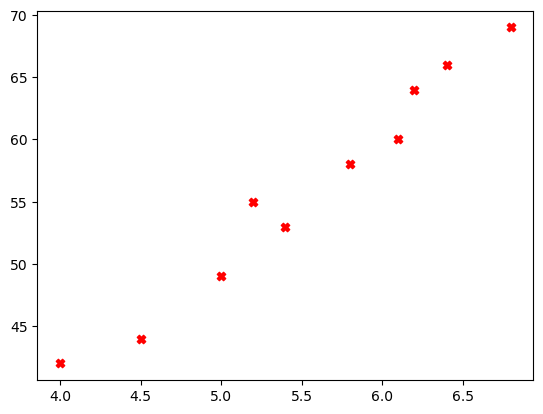

In [6]:
plt.scatter(height, weight, color='red', marker='X')

In [7]:
N = height.shape[0]
X = np.ones((N, 2))


In [8]:
X[:, 1] = height

In [9]:
X

array([[1. , 4. ],
       [1. , 4.5],
       [1. , 5. ],
       [1. , 5.2],
       [1. , 5.4],
       [1. , 5.8],
       [1. , 6.1],
       [1. , 6.2],
       [1. , 6.4],
       [1. , 6.8]])

In [10]:
y = weight

In [11]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([-0.47266515, 10.19362187])

In [12]:
x1 = height[0]
x2 = height[N-1]

y1 = w[0] + w[1]*x1
y2 = w[0] + w[1]*x2

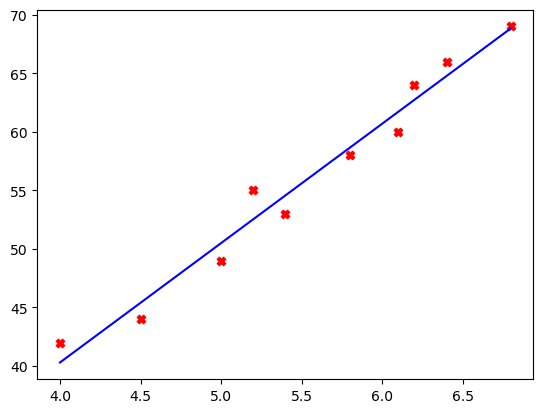

In [13]:
plt.scatter(height, weight, color='red', marker='X')

plt.plot([x1, x2], [y1, y2], color='blue')

In [14]:
from sklearn import linear_model

In [15]:
lin_reg = linear_model.LinearRegression()

In [16]:
?lin_reg

Type:        LinearRegression
String form: LinearRegression()
File:        ~/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an estimator wi

In [17]:
# kada koristimo ovu funkciju fit ne trebaju nam 1 na pocetku
lin_reg.fit(height.reshape(-1, 1), weight)

LinearRegression()

In [18]:
lin_reg.coef_

array([10.19362187])

In [19]:
lin_reg.intercept_

-0.4726651480637756

- Gradijent = vektor u kome funkcija najbrze raste (njegov smer)
- kada se prica o optimizaciji prica se o nalazenju minimuma 
- Algoritam gradijentnog spusta 
    - imam korak **alpha** koji algoritam pravi
    - polako se krecem, i nadam se da cu da dodjem do min 

In [20]:
def loss_function(X, y, w):
    N = y.shape[0] 
    
    gradient = np.zeros(w.shape[0])
    
    predictions = X.dot(w)
    
    diff = predictions - y
    
    gradient = 1/N*(X.T).dot(diff) 
    
    loss = 1/(2*N) * np.sum(diff**2)
    
    return loss, gradient 
    

In [25]:
def gradient_descent(X, y, w, num_iters, alpha):
    loss_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        loss, gradient = loss_function(X, y, w)
        
        w = w - alpha*gradient 
        
        loss_history[i] = loss 
        
    return w, loss_history

In [26]:
height = np.array([4.0, 4.5, 5.0, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
weight = np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])

In [27]:
N = height.shape[0]
X = np.ones((N, 2))
X[:, -1] = height 
y = weight.reshape(-1, 1)

num_iters = 40
alpha = 0.01

w = np.zeros((2, 1))

w, loss_history = gradient_descent(X, y, w, num_iters, alpha)

In [28]:
y_predict = X.dot(w)

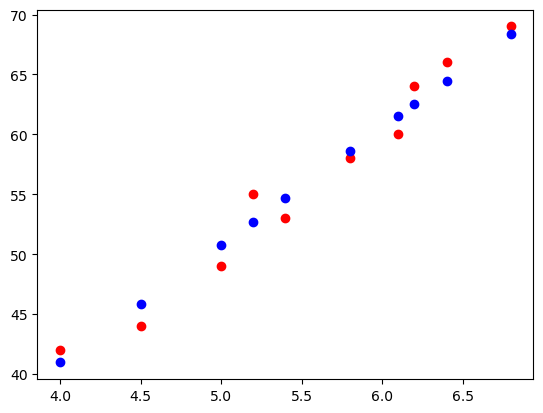

In [29]:
plt.scatter(X[:, -1], y, color='red')
plt.scatter(X[:, -1], y_predict, color='blue')

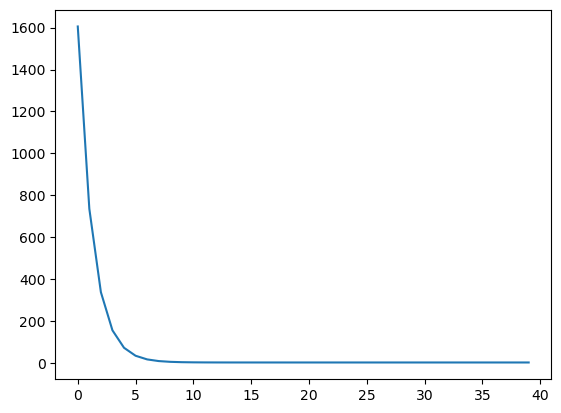

In [30]:
plt.plot(np.arange(num_iters), loss_history)